# Compare evaluations of different runs


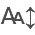

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# imports
from __future__ import annotations
import pandas as pd
import yaml
from pathlib import Path
from typing import List, Dict, Any

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# autoreload
%load_ext autoreload
%autoreload 2

In [44]:
# fction that takes list of runs and list of fields to compare in a table
def get_row_from_fields(logdict: dict, fields: List[str]) -> Dict[str, Any]:
    row = {}
    for field in fields:
        subfields = field.split(":")
        out = logdict
        for sf in subfields:
            if not out:
                break
            out = out.get(sf, False)
        row[subfields[-1]] = out
    return row


def compare_runs(runs_folders: List[str], fields: List[str]) -> pd.DataFrame:
    runs_paths = [Path(run_folder) for run_folder in runs_folders]
    index = [run_path.parent.parent.name + "/" + run_path.name for run_path in runs_paths]
    df = pd.DataFrame()
    for i, folder in enumerate(runs_folders):
        with open(Path(folder) / "log_file.yaml", "r", encoding="utf-8") as f:
            logdict = yaml.safe_load(f)
        for key, value in logdict.items():
            if "evaluation_" in key:
                row = {"eval": key}
                row.update(get_row_from_fields(value, fields))
                df_row = pd.DataFrame(row, index=[index[i]])
                df = pd.concat([df,df_row])
                df.reset_index()
    return df


runs_folders = [
    "../predictions/tough-jazz-406_rassp1_neims1_200pt_200ft/NIST_denovo/1711198592_valid_full",
    "../predictions/tough-jazz-406_rassp1_neims1_200pt_200ft/NIST_denovo/1711198593_valid_full_200peaks",
    "../predictions/valiant-eon-418_rassp1_neims1_200peaks_masks/NIST_denovo/1712049653_valid_full_beam10_peaks300",
    "../predictions/valiant-eon-418_rassp1_neims1_200peaks_masks/NIST_denovo/1712049653_valid_full_beam10_peaks200",
    "../predictions/different-mountain-417_NClike/NIST_denovo/1712049552_valid_full_beam10_peaks300",
    "../predictions/different-mountain-417_NClike/NIST_denovo/1712049552_valid_full_beam10_peaks200",
    "../predictions/lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/NIST_denovo/1710756718_valid_full_beam10_peaks300",
    "../predictions/lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/NIST_denovo/1710756718_valid_full_beam10_peaks200",
    "../predictions/efficient-frog-407_rassp1_neims1_200pt_300ft/NIST_denovo/1711198715_valid_full_beam10",
    "../predictions/efficient-frog-407_rassp1_neims1_200pt_300ft/NIST_denovo/1711198715_valid_full_beam10_200peaks",
    ] 
fields = ["eval_config:fingerprint_type",
          "eval_config:simil_function",
          "eval_config:filtering_args:max_num_peaks",
          "percentage_of_precise_preds_similsort", 
          "denovo-percentage_of_BART_wins_similsort",
          "percentage_of_precise_preds_probsort",
          "percentage_of_better_than_threshold_similsort"

          ]
compare_runs(runs_folders, fields)

eval  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...  evaluation_0   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...  evaluation_0   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...  evaluation_0   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...  evaluation_0   
different-mountain-417_NClike/1712049552_valid_...  evaluation_0   
different-mountain-417_NClike/1712049552_valid_...  evaluation_0   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...  evaluation_0   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...  evaluation_0   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...  evaluation_0   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...  evaluation_0   

                                                   fingerprint_type  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...         daylight   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...         daylight   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...         daylight   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...         daylight   
different-mountain-417_NClike/1712049552_valid_...         daylight   
different-mountain-417_NClike/1712049552_valid_...         daylight   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...         daylight   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...         daylight   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...         daylight   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...         daylight   

                                                   simil_function  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...       tanimoto   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...       tanimoto   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...       tanimoto   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...       tanimoto   
different-mountain-417_NClike/1712049552_valid_...       tanimoto   
different-mountain-417_NClike/1712049552_valid_...       tanimoto   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...       tanimoto   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...       tanimoto   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...       tanimoto   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...       tanimoto   

                                                    max_num_peaks  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...            300   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...            200   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...            300   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...            200   
different-mountain-417_NClike/1712049552_valid_...            300   
different-mountain-417_NClike/1712049552_valid_...            200   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...            300   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...            200   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...            300   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...            200   

                                                   percentage_of_precise_preds_similsort  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...                    0.4101572204280087   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...                    0.4224584666971498   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...                    0.5653902118749334   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...                    0.5870675201950922   
different-mountain-417_NClike/1712049552_valid_...                    0.5383468786598999   
different-mountain-417_NClike/1712049552_valid_...                    0.5593659503124524   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...                    0.5754693544380168   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...                     0.596822130772748   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...                   0.42080420200873053   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...                    0.4267261088248743 

## Visualize performance based on num of peaks
Or any metric based on any data-related parameter 

In [10]:
# imports
from __future__ import annotations
import sys 
sys.path.append("..")
from data_utils import build_single_datapipe, filter_datapoints
import pandas as pd
import plotly.express as px


In [20]:
# ok.. put everything together
def visualize_inspected_statistic(best_preds_path: str,
                                  original_data_path: str,
                                  filtering_args: dict,
                                  inspected_statistic: callable,
                                  pregrouping_function: callable,
                                  plot_function: callable = px.box,
                                  plot_x_label: str | None = None,
                                  plot_y_label: str | None = None,
                                  plot_title: str | None = None) -> None:
    
    # load predictions and filter original data
    df_best_predictions = pd.read_json(best_preds_path, lines=True, orient="records")
    original_data = pd.read_json(original_data_path, lines=True, orient="records")
    filter_mask = original_data.progress_apply(lambda row: filter_datapoints(row, filtering_args), axis=1)
    filtered_original_data = original_data[filter_mask]

    combined_df = pd.concat([df_best_predictions.reset_index(drop=True), filtered_original_data.reset_index(drop=True)], axis=1)

    # create a grouping column based on the pregrouping function
    combined_df["grouping_col"] = combined_df.apply(pregrouping_function, axis=1)

    # make a plot grouped by "grouping_col" showing "smiles_sim_of_closest_daylight_tanimoto"
    fig = plot_function(combined_df, x="grouping_col", y=inspected_statistic(combined_df))
    fig.update_layout(
                title=plot_title,
                xaxis_title=plot_x_label,
                yaxis_title=plot_y_label,
    )
    fig.show()


best_preds_path = "../predictions/valiant-eon-418_rassp1_neims1_200peaks_masks/NIST_denovo/1712049653_valid_full_beam10_peaks300/df_best_predictions.jsonl"
original_data_path = "../data/datasets/NIST/NIST_split_filip/denovo_data/valid_with_denovo_info.jsonl"

filtering_args = {"max_num_peaks": 300, "max_mz": 500, "max_mol_repr_len": 100, "mol_repr": "smiles"}

inspected_statistic = lambda df: df["smiles_sim_of_closest_daylight_tanimoto"]
pregrouping_function = lambda row: len(row["mz"]) // 10 * 10 # binned num of peaks

# num of predictions 
visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              lambda df: (df["smiles_sim_of_closest_daylight_tanimoto"] >= 0.85).astype(int), 
                              pregrouping_function, 
                              px.histogram, 
                              "Number of peaks", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Number of good enough (>=0.85) predictions vs number of peaks")


visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              lambda df: (df["smiles_sim_of_closest_daylight_tanimoto"] == 1).astype(int), 
                              pregrouping_function, 
                              px.histogram, 
                              "Number of peaks", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Number of perfect (==1) predictions vs number of peaks")


visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              inspected_statistic, 
                              pregrouping_function, 
                              px.box, 
                              "Number of peaks", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Median (simil_best) smiles similarity vs number of peaks")


visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              inspected_statistic, 
                              lambda row: len(row["smiles"]), 
                              px.box, 
                              "Len of SMILES", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Median (simil_best) smiles similarity vs len of SMILES")   

100%|██████████| 29053/29053 [00:05<00:00, 5264.24it/s]


100%|██████████| 29053/29053 [00:05<00:00, 5232.19it/s]


100%|██████████| 29053/29053 [00:05<00:00, 5264.57it/s]


100%|██████████| 29053/29053 [00:05<00:00, 5308.09it/s]


In [11]:
# histogram of lens of spectra
pregrouping_function = lambda x: len(x["mz"]) // 10 * 10
inspected_statistic = lambda df: [1] * len(df)
visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              inspected_statistic, 
                              pregrouping_function, 
                              px.histogram, 
                              "Number of peaks", 
                              "count", 
                              "Num of peaks histo")


100%|██████████| 29053/29053 [00:05<00:00, 5144.49it/s]
